In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

### Calibration

In [2]:
n2_path = '/Users/blandt/Desktop/Data/PAR2 GFP mutants 2/N2'
n2_paths = direcslist(n2_path, 1)

<IPython.core.display.Javascript object>


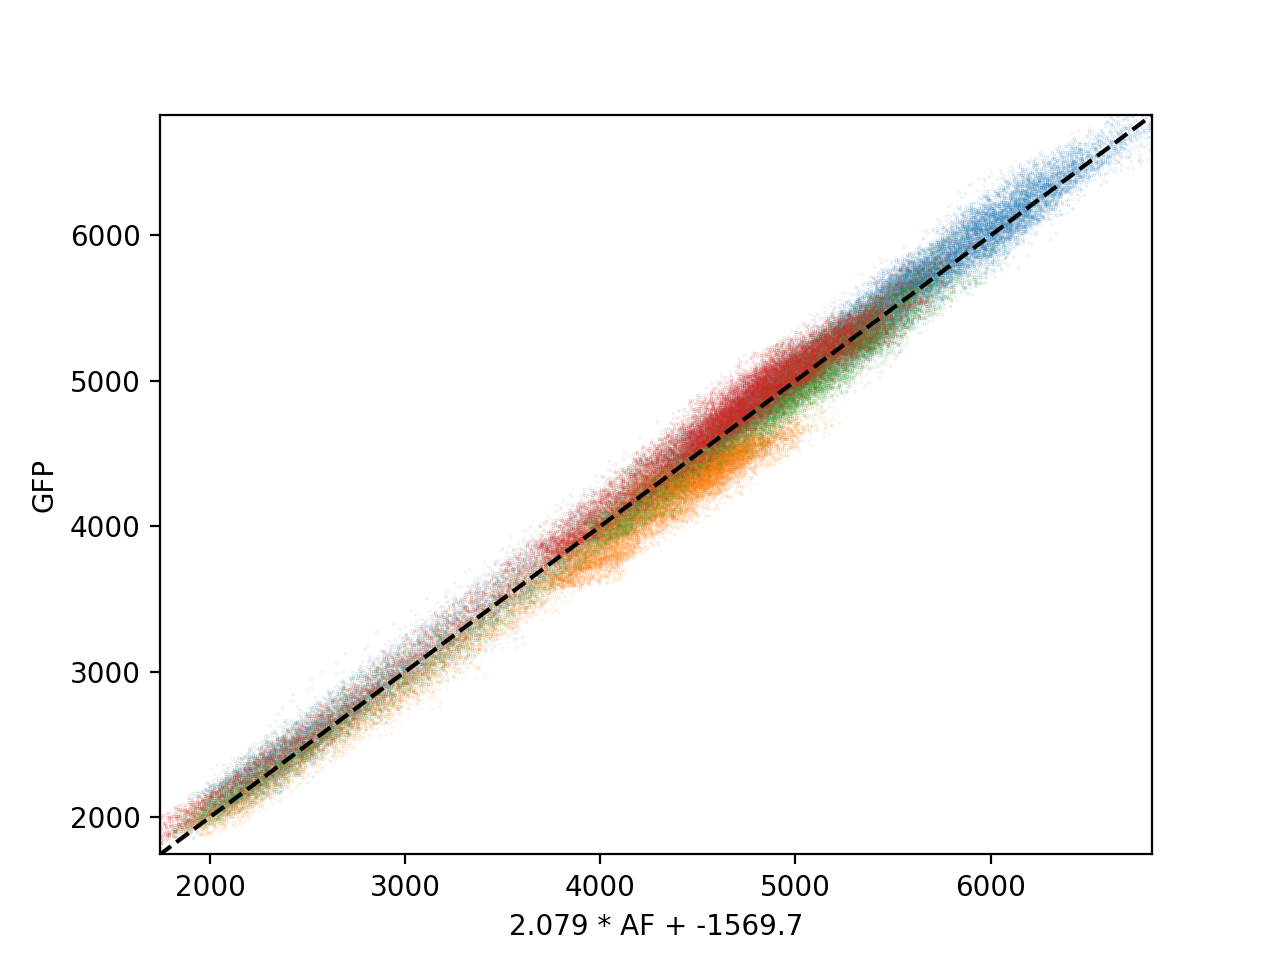

[2.0794281370249403, -1569.737406466359]


In [3]:
af = AfCorrelation(n2_paths, sigma=2, expand=10, method='OLS')
af.run()
af.plot_prediction()
print(af.params)

### Correction

In [4]:
path = '/Users/blandt/Desktop/Data/PAR2 GFP mutants 2/Experiment'
for p in direcslist(path, 1):
    ch1 = load_image(glob.glob(p + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(p + '/*488 SP 630-75*')[0])
    af_corrected = af_subtraction(ch1, ch2, *af.params)
    save_img(af_corrected, p + '/af_corrected.tif')